


### Naive Bayes (Simplified Explanation):

Imagine you’re a detective trying to solve a mystery. You look at clues and make a decision based on probabilities. For example:
- If a suspect has muddy shoes, they are likely to have been outside.
- If they also have wet clothes, it’s even more likely they were caught in the rain.

Naive Bayes works like this: it looks at "clues" (features) and predicts the most probable "outcome" (class) based on the data.

---

### **What is Naive Bayes?**
Naive Bayes is a **probabilistic algorithm** used for classification tasks. It’s based on **Bayes' Theorem**, which calculates the probability of an event given prior knowledge of conditions related to the event.

---

### **Bayes' Theorem Formula:**
\[
P(A|B) = \frac{P(B|A) \cdot P(A)}{P(B)}
\]

Where:
- \( P(A|B) \): Probability of \( A \) (class) given \( B \) (features).
- \( P(B|A) \): Probability of \( B \) (features) given \( A \) (class).
- \( P(A) \): Prior probability of \( A \) (class).
- \( P(B) \): Prior probability of \( B \) (features).

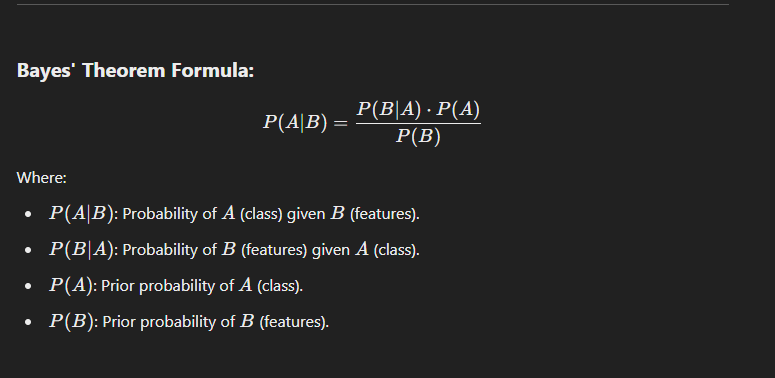

---


### **Why "Naive"?**
It assumes that all features are **independent** of each other. For example, it assumes muddy shoes and wet clothes are unrelated, even though they might be connected. This assumption is rarely true, but the algorithm still works well in practice!

---

### **How Naive Bayes Works (Step-by-Step):**

1. **Calculate Probabilities:**
   - For each class, calculate the likelihood of the data features belonging to that class.
   - Use the formula to combine probabilities.

2. **Choose the Class:**
   - Assign the class with the highest probability to the data point.

---

### **Types of Naive Bayes:**
1. **Gaussian Naive Bayes:** Assumes features are normally distributed (used for continuous data).
2. **Multinomial Naive Bayes:** Used for discrete data, like word counts in text classification.
3. **Bernoulli Naive Bayes:** Used for binary data, like whether a word appears in a document or not.

---

### **Real-World Example:**
Imagine you're building an email spam filter:
- Features: Words like "discount," "free," "money."
- Classes: "Spam" or "Not Spam."
- Naive Bayes calculates the probability of an email being spam based on the words it contains and assigns the class with the highest probability.

---




In [22]:
import pandas as pd
df = pd.read_csv("titanic.csv")
df.head()

,PassengerId,Name,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,"Braund, Mr. Owen Harris",3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,"Heikkinen, Miss. Laina",3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,female,35.0,1,0,113803,53.1000,C123,S,1
4,5,"Allen, Mr. William Henry",3,male,35.0,0,0,373450,8.0500,NaN,S,0


In [23]:
df = df.drop(['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin', 'Embarked'], axis=1)
df.head()

,Pclass,Sex,Age,Fare,Survived
0,3,male,22.0,7.2500,0
1,1,female,38.0,71.2833,1
2,3,female,26.0,7.9250,1
3,1,female,35.0,53.1000,1
4,3,male,35.0,8.0500,0


In [24]:
inputs = df.drop('Survived', axis='columns')
target = df['Survived']

In [25]:
dummies = pd.get_dummies(inputs.Sex).astype(int)
dummies.head()

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [26]:
inputs = pd.concat([inputs,dummies],axis='columns')

In [27]:
inputs.head()

,Pclass,Sex,Age,Fare,female,male
0,3,male,22.0,7.2500,0,1
1,1,female,38.0,71.2833,1,0
2,3,female,26.0,7.9250,1,0
3,1,female,35.0,53.1000,1,0
4,3,male,35.0,8.0500,0,1


In [28]:
inputs.drop('Sex',axis='columns',inplace=True)

In [29]:
inputs.head()

,Pclass,Age,Fare,female,male
0,3,22.0,7.2500,0,1
1,1,38.0,71.2833,1,0
2,3,26.0,7.9250,1,0
3,1,35.0,53.1000,1,0
4,3,35.0,8.0500,0,1


In [30]:
# Now we have to deal with NaN values in age column
inputs.columns[inputs.isna().any()]

Index(['Age'], dtype='object')

In [33]:
inputs.Age[:10]

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
5     NaN
6    54.0
7     2.0
8    27.0
9    14.0
Name: Age, dtype: float64

In [34]:
inputs.Age = inputs.Age.fillna(inputs.Age.mean())

In [35]:
inputs.Age[:10]

0    22.000000
1    38.000000
2    26.000000
3    35.000000
4    35.000000
5    29.699118
6    54.000000
7     2.000000
8    27.000000
9    14.000000
Name: Age, dtype: float64

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(inputs,target,test_size=0.2)


In [49]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(X_train,y_train)

GaussianNB()

In [50]:
model.score(X_test,y_test)

0.8044692737430168